# Utilizando algoritmos genéticos para maximização de lucros de uma empresa de fretes marítimos

---


## **Problema**:
Colocar o máximo de caixas possíveis dentro de um container de carga marítima, atentendo a todos os requisitos estipulados.

## **Objetivo**:
Criar um algoritmo genético capaz de visar o maior lucro por frete para compensar o trajeto e os custos do transporte.

## **Requisitos de sucesso**:
Chegar na geração com melhor aptidão ao nosso problema considerando que:
*   O peso total da geração não pode ser maior que a capacidade do container em gramas.
*   O volume total da geração não pode ser maior que a capacidade do container em metros cubicos.
* O lucro da geração precisa ser o maior possível dentro das possibilidades definidas na variável de gerações máximas.





## Implementação do Algoritmo Genético
Primeiro fazemos a importação das bibliotecas que utilizaremos para geração de população aleatória ```random```, visualização dos dados ```matplotlib``` e processamento de matrizes ```numpy```.



In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

Definimos as caixas que vão dentro do container (valor em dólares, peso em gramas, volume em metros cúbicos)

In [ ]:
boxes = [
    (100, 5000, 1.0),
    (200, 10000, 2.0),
    (150, 8000, 1.5),
    (180, 9000, 1.8),
    (90, 4000, 0.9),
    (60, 3000, 0.6),
    (120, 6000, 1.2),
    (140, 7000, 1.4),
    (110, 5500, 1.1),
    (130, 6500, 1.3),
    (200, 9500, 1.9),
    (110, 4800, 1.0),
    (160, 7500, 1.5),
    (120, 6800, 1.3),
    (130, 5000, 1.2),
    (210, 10000, 2.1),
    (50, 2500, 0.5),
    (170, 8500, 1.7),
    (95, 4750, 0.95),
    (125, 6250, 1.25),
    (105, 5100, 1.05),
    (205, 10100, 2.05),
    (155, 8100, 1.55),
    (185, 9100, 1.85),
    (95, 4100, 0.95),
    (65, 3100, 0.65),
    (125, 6100, 1.25),
    (145, 7100, 1.45),
    (115, 5600, 1.15),
    (135, 6600, 1.35),
    (205, 9600, 1.95),
    (115, 4900, 1.05),
    (165, 7600, 1.65),
    (125, 6900, 1.35),
    (135, 5100, 1.25),
    (215, 10150, 2.15),
    (55, 2550, 0.55),
    (175, 8600, 1.75),
    (100, 4800, 1.0),
    (130, 6300, 1.3),
    (140, 6750, 1.4),
    (225, 11050, 2.2),
    (110, 5300, 1.1),
    (120, 5850, 1.2),
    (190, 9200, 1.9),
    (160, 7800, 1.6),
    (150, 7300, 1.5),
    (170, 8300, 1.7),
    (180, 8800, 1.8),
    (200, 9800, 2.0)
]

Definindo parâmetros para o algoritmo genético e os requisitos de sucesso, onde:

*  ```population_size``` : quantidade de individuos;
*  ```num_generations``` : quantidade de gerações;
*  ```max_weight``` : capacidade máxima de peso do container em gramas;
*  ```max_volume``` : capacidade máxima de volume do container em metros cúbicos;
*  ```mutation_rate``` : taxa de mutação;




In [ ]:
population_size = 100
num_generations = 300
max_weight = 27000000
max_volume = 28.0
mutation_rate = 0.01

A função ```calculate_fitness``` avalia o quão apto o individuo está, dados os requisitos do problema. Calcula o valor total das caixas selecionadas (onde o gene é 1), somando também o peso e o volume. Se o peso total exceder ```max_weight``` ou o volume total exceder ```max_volume```, a função retorna
0, indicando que não passou nos requisitos. Caso contrário, retorna o valor total das caixas somado a um bônus proporcional ao volume utilizado, calculado como (total_volume / max_volume) * 100, optimizando o uso do volume disponível no container.

In [ ]:
def calculate_fitness(individual):
    total_value = 0
    total_weight = 0
    total_volume = 0
    for i in range(len(individual)):
        if individual[i] == 1:
            total_value += boxes[i][0]
            total_weight += boxes[i][1]
            total_volume += boxes[i][2]
    if total_weight > max_weight:
        return 0
    if total_volume > max_volume:
        return 0
    return total_value + (total_volume / max_volume) * 100

A função ```generate_random_population``` gera uma população aleatória de indivíduos onde 1 é seleção da caixa no index específico e 0 é a não seleção da mesma.

In [ ]:
def generate_random_population(size):
    return [[random.randint(0, 1) for _ in range(len(boxes))] for _ in range(size)]

A função ```crossover``` realiza o cruzamento de dois indivíduos passados no parâmetro (parent1 e parent2). Selecionamos um ponto de cruzamento aleatório dentro dos indivíduos, então criamos dois novos indivíduos (child1 e child2) combinando as partes dos pais divididas nesse ponto.

In [ ]:
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(boxes) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

Em ```mutate``` realizamos a mutação de um indivíduo passado por parâmetro. Criamos uma cópia do indivíduo e ela percorre cada gene. Com uma probabilidade definida em ```mutation_rate```, a função inverte o valor do gene (0 se for 1 e 1 se for 0). Esse processo gera variações aleatórias no indivíduo ajudando a explorar novas soluções.

In [ ]:
def mutate(individual):
    mutated_individual = individual[:]
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            mutated_individual[i] = 1 if mutated_individual[i] == 0 else 0
    return mutated_individual

Em ```calculate_weight_volume``` calculamos o peso e o volume total de um individuo. Utilizamos o dado para visualização dos resultados e apuração da melhor solução.

In [ ]:
def calculate_weight_volume(individual):
    total_weight = sum(boxes[i][1] for i in range(len(individual)) if individual[i] == 1)
    total_volume = sum(boxes[i][2] for i in range(len(individual)) if individual[i] == 1)
    return total_weight, total_volume

Criamos a função ```visualize_container``` para visualização do preenchimento do container em volume. Criamos um gráfico de barras horizontais representando o volume de cada caixa ativa no indivíduo. Cada barra é rotulada com o volume correspondente, gerando uma visualização clara do preenchimento do contêiner.

In [ ]:
def visualize_container(individual):
    fig, ax = plt.subplots()
    ax.set_xlim(0, max_volume)
    active_boxes_count = sum(individual)
    ax.set_ylim(0, active_boxes_count)
    ax.set_yticks(range(active_boxes_count + 1))

    ax.set_title("Preenchimento do Contêiner")
    ax.set_xlabel("Volume (m³)")
    ax.set_ylabel("Caixas")

    total_volume_used = 0
    y_offset = 0

    for idx, active in enumerate(individual):
        if active:
            volume = boxes[idx][2]
            ax.barh(y_offset, volume, height=1, edgecolor='black', color='blue', align='center')
            ax.text(volume + 0.5, y_offset, f'{volume:.2f} m³', ha='left', va='center', fontsize=9)
            y_offset += 1
            total_volume_used += volume

    ax.axvline(x=max_volume, color='r', linestyle='--', label=f'Máx Volume: {max_volume} m³')
    ax.axvline(x=total_volume_used, color='green', linestyle='-', linewidth=2, label=f'Total Volume Usado: {total_volume_used:.2f} m³')

    ax.legend(loc='upper right')
    plt.show()

A função ```plot_combined_box_distributions``` visualiza a distribuição combinada de valor, peso e volume das caixas selecionadas em um indivíduo. Extraimos as caixas selecionadas e normalizamos seus valores, pesos e volumes para uma escala comum. Criamos um gráfico de barras, onde cada barra representa uma caixa, e suas proporções.

In [ ]:
def plot_combined_box_distributions(individual, boxes):
    selected_boxes = [boxes[i] for i in range(len(individual)) if individual[i] == 1]
    if not selected_boxes:
        print("Nenhuma caixa foi selecionada.")
        return

    values, weights, volumes = zip(*selected_boxes)

    max_value = max(values)
    max_weight = max(weights)
    max_volume = max(volumes)

    norm_values = [v / max_value for v in values]
    norm_weights = [w / max_weight for w in weights]
    norm_volumes = [v / max_volume for v in volumes]

    indices = np.arange(len(norm_values))

    fig, ax = plt.subplots(figsize=(12, 8))
    bars_values = ax.bar(indices, norm_values, label='Valor', color='green', alpha=0.6)
    bars_weights = ax.bar(indices, norm_weights, bottom=norm_values, label='Peso(kg)', color='red', alpha=0.6)
    bars_volumes = ax.bar(indices, norm_volumes, bottom=np.array(norm_values) + np.array(norm_weights), label='Volume(m³)', color='blue', alpha=0.6)

    ax.set_xlabel('Caixas')
    ax.set_ylabel('Proporção Normalizada')
    ax.set_title('Distribuição Combinada de Valor, Peso e Volume das Caixas')
    ax.set_xticks(indices)
    ax.set_xticklabels([f'Caixa {i+1}' for i in indices], rotation=45)
    ax.legend()

    for rect, val in zip(bars_values, values):
        ax.annotate(f'{val}',
                    xy=(rect.get_x() + rect.get_width() / 2, rect.get_y()),
                    xytext=(0, 10),
                    textcoords="offset points",
                    ha='center', va='top', fontsize=6)

    for rect, weight in zip(bars_weights, weights):
        ax.annotate(f'{weight/1000}kg',
                    xy=(rect.get_x() + rect.get_width() / 2, rect.get_y()),
                    xytext=(0, 10),
                    textcoords="offset points",
                    ha='center', va='top', fontsize=6)

    for rect, vol in zip(bars_volumes, volumes):
        ax.annotate(f'{vol}m³',
                    xy=(rect.get_x() + rect.get_width() / 2, rect.get_y()),
                    xytext=(0, 10),
                    textcoords="offset points",
                    ha='center', va='top', fontsize=6)

    plt.tight_layout()
    plt.show()

Em ```plot_fitness_evolution``` plotamos os resultados das gerações ao longo da execução do algoritmo, para visualização de como o lucro da empresa no container em questão foi maximizado.

In [ ]:
def plot_fitness_evolution(fitness_values):
    plt.figure(figsize=(10, 5))
    plt.plot(fitness_values, marker='o', linestyle='-', color='b')
    plt.title('Evolução da Aptidão Máxima ao Longo das Gerações')
    plt.xlabel('Geração')
    plt.ylabel('Aptidão Máxima')
    plt.grid(True)
    plt.show()

* ```population```: população gerada aleatóriamente no primeiro momento;
* ```best_fitness_values```: array para armazenar os melhores valores de aptidão entre os individuos;
* ```weight_volumes```: array para armazenar os pesos e volumes dos individuos;
* ```best_indiviual```: o melhor individuo encontrado no momento;
* ```best_value```: o melhor valor encontrado no momento;

In [ ]:
population = generate_random_population(population_size)
best_fitness_values = []
weight_volumes = []
best_individual = None
best_value = 0

Aqui implementamos um loop de gerações. Na geração, a população é classificada pela aptidão em ordem decrescente. O melhor indivíduo, seu valor de aptidão e peso/volume são registrados. Se o melhor indivíduo é encontrado, ele é salvo em ```best_individual```. Criamos uma população a partir do melhor indivíduo da geração. Então geramos novos individuos usando ```crossover``` e ```mutate``` para cruzar e mutar. A população é então atualizada para a próxima leva.

In [ ]:
import time

inicio = time.time()
for generation in range(num_generations):
    population = sorted(population, key=calculate_fitness, reverse=True)
    best_fitness = calculate_fitness(population[0])
    best_fitness_values.append(best_fitness)
    weight_volumes.append(calculate_weight_volume(population[0]))
    print(f"Geração {generation}: Melhor aptidão = {best_fitness}, Melhor indivíduo = {population[0]}")

    if best_fitness > best_value:
        best_value = best_fitness
        best_individual = population[0]

    new_population = [population[0]]
    while len(new_population) < population_size:
        parent1, parent2 = random.choices(population[:10], k=2)
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.extend([child1, child2])
    population[:] = new_population[:population_size]
fim = time.time()

Geração 0: Melhor aptidão = 2920.0, Melhor indivíduo = [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Geração 1: Melhor aptidão = 2920.0, Melhor indivíduo = [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Geração 2: Melhor aptidão = 2920.0, Melhor indivíduo = [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Geração 3: Melhor aptidão = 2920.0, Melhor indivíduo = [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Geração 4: Melhor aptidão = 2920.0, Melhor indivíduo = [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 

In [ ]:
print ('Tempo de execução: %f' % (fim - inicio)+'s')

Tempo de execução: 0.658246s


Abaixo imprimimos os resultados da solução encontrada, sejam em valores matemáticos ou graficamente, estes que demonstram: o preenchimento do ocontainer, a evolução no lucro de cada geração, combinação dos requisitos em cada caixa.


Melhor Indivíduo: [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Valor Total: 2960.0 dólares
Peso Total: 133.7 kg
Volume Total: 27.999999999999996 metros cúbicos


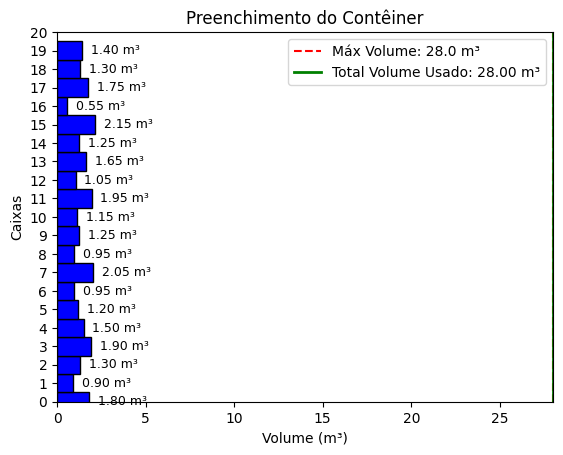

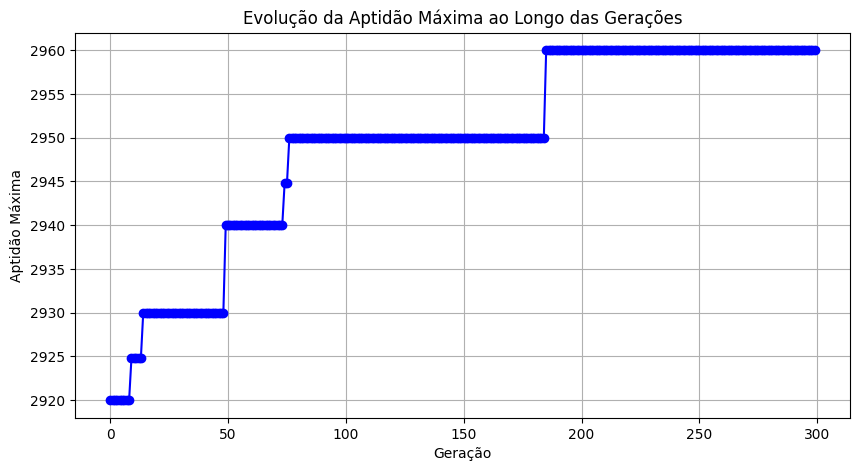

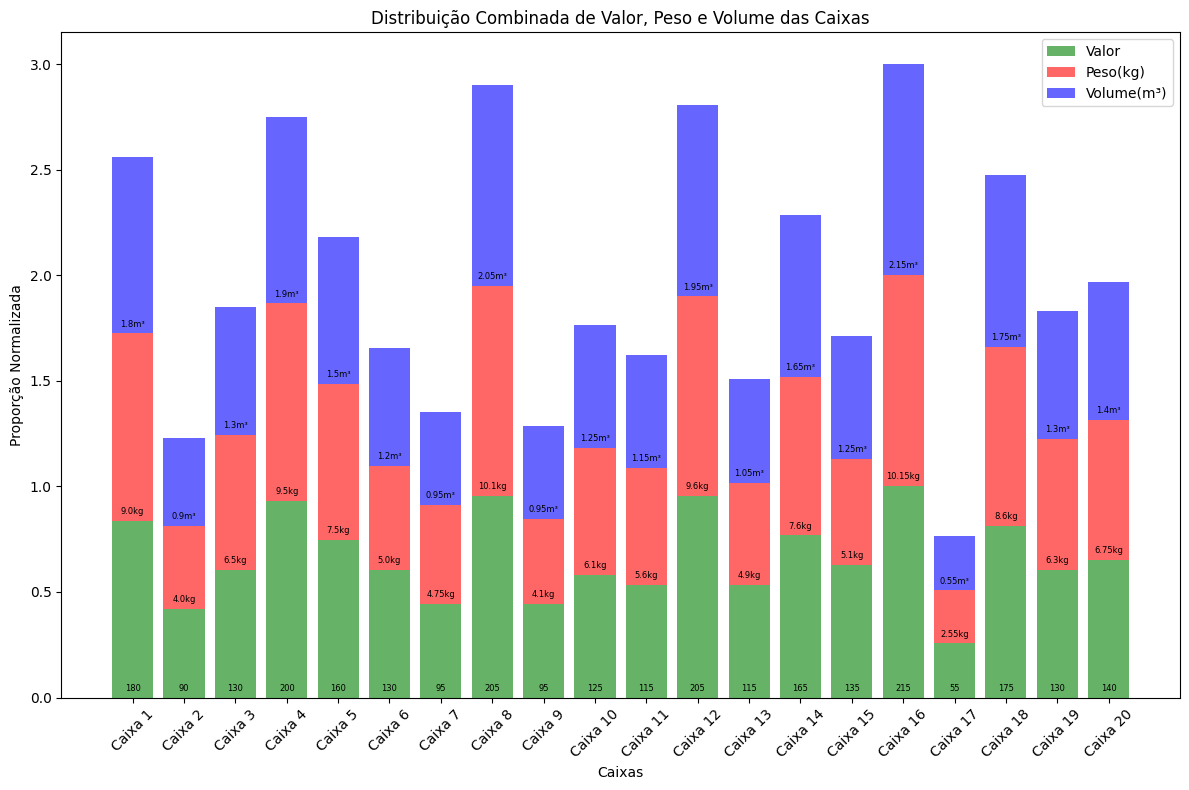

In [ ]:
total_weight, total_volume = calculate_weight_volume(best_individual)
print(f"\nMelhor Indivíduo: {best_individual}")
print(f"Valor Total: {best_value} dólares")
print(f"Peso Total: {total_weight / 1000} kg")  # Convertendo gramas para kg
print(f"Volume Total: {total_volume} metros cúbicos")

visualize_container(best_individual)
plot_fitness_evolution(best_fitness_values)
plot_combined_box_distributions(best_individual, boxes)

In [ ]:
population_size = 25
num_generations = 50
max_weight = 27000000
max_volume = 38.0
mutation_rate = 0.01

population = generate_random_population(population_size)
best_fitness_values = []
weight_volumes = []
best_individual = None
best_value = 0

In [ ]:
inicio = time.time()
for generation in range(num_generations):
    population = sorted(population, key=calculate_fitness, reverse=True)
    best_fitness = calculate_fitness(population[0])
    best_fitness_values.append(best_fitness)
    weight_volumes.append(calculate_weight_volume(population[0]))
    print(f"Geração {generation}: Melhor aptidão = {best_fitness}, Melhor indivíduo = {population[0]}")

    if best_fitness > best_value:
        best_value = best_fitness
        best_individual = population[0]

    new_population = [population[0]]
    while len(new_population) < population_size:
        parent1, parent2 = random.choices(population[:10], k=2)
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.extend([child1, child2])
    population[:] = new_population[:population_size]
fim = time.time()
print ('Tempo de execução: %f' % (fim - inicio)+'s')

Geração 0: Melhor aptidão = 3780.3947368421054, Melhor indivíduo = [1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
Geração 1: Melhor aptidão = 3893.5526315789475, Melhor indivíduo = [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]
Geração 2: Melhor aptidão = 3944.6052631578946, Melhor indivíduo = [0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1]
Geração 3: Melhor aptidão = 3944.6052631578946, Melhor indivíduo = [0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1]
Geração 4: Melhor aptidão = 3944.6052631578946, Melhor indivíduo = [0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 


Melhor Indivíduo: [1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Valor Total: 3959.7368421052633 dólares
Peso Total: 185.9 kg
Volume Total: 37.9 metros cúbicos


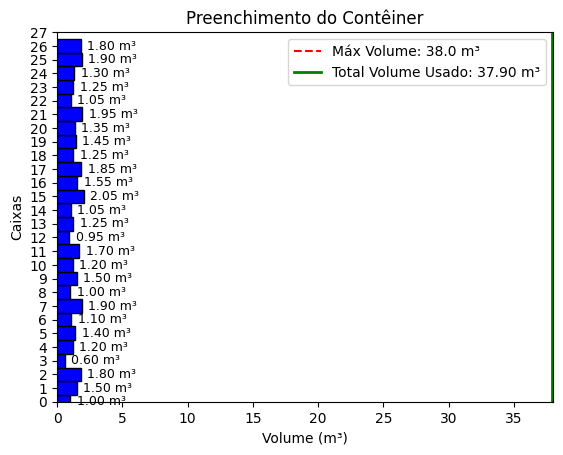

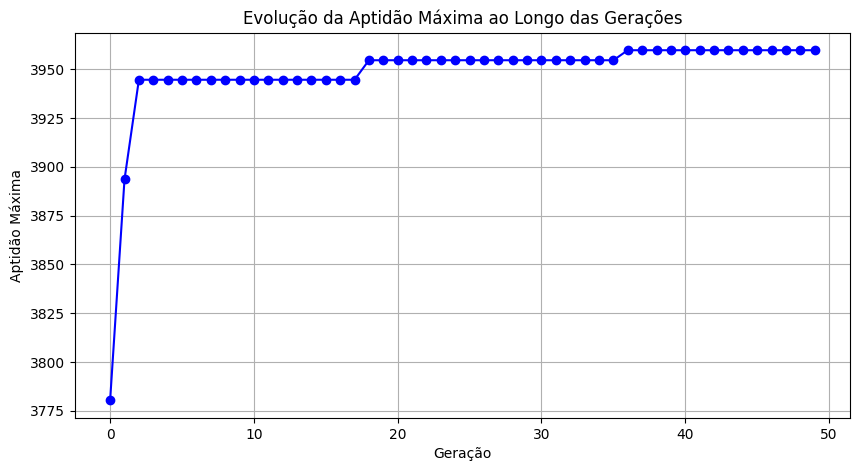

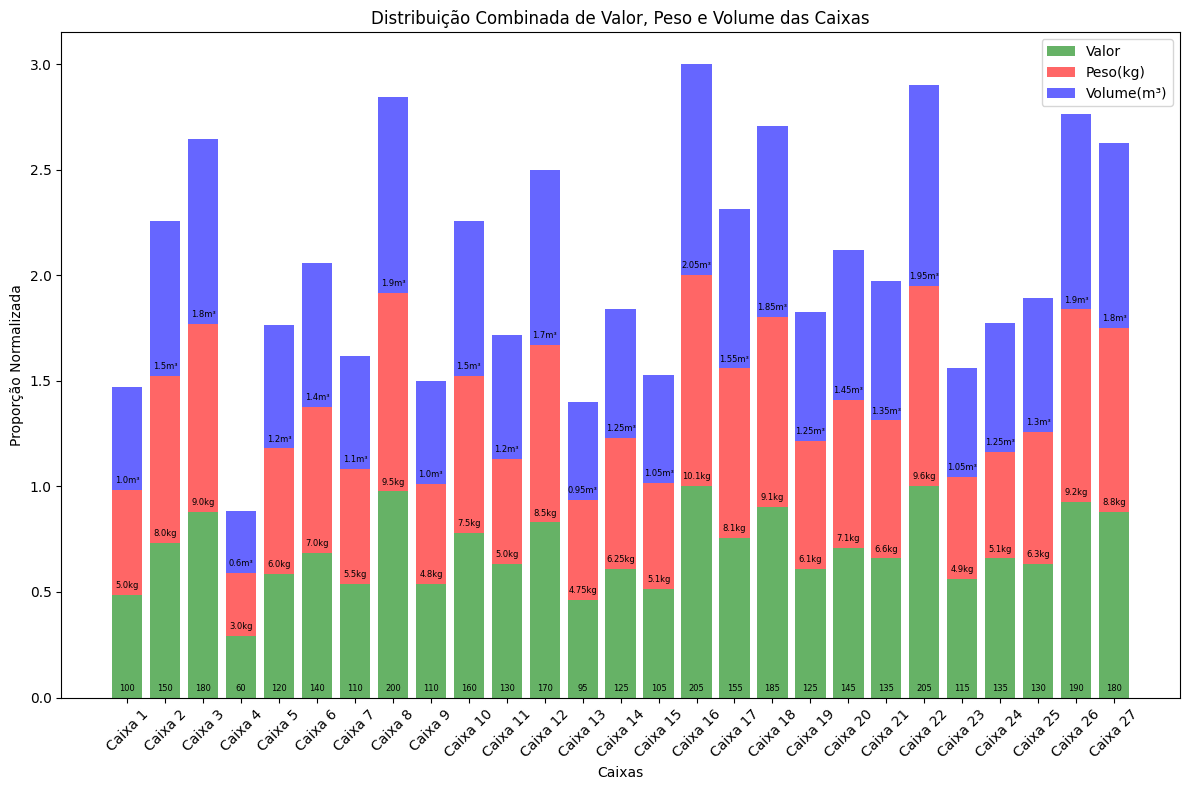

In [ ]:
total_weight, total_volume = calculate_weight_volume(best_individual)
print(f"\nMelhor Indivíduo: {best_individual}")
print(f"Valor Total: {best_value} dólares")
print(f"Peso Total: {total_weight / 1000} kg")  # Convertendo gramas para kg
print(f"Volume Total: {total_volume} metros cúbicos")

visualize_container(best_individual)
plot_fitness_evolution(best_fitness_values)
plot_combined_box_distributions(best_individual, boxes)

## Experiência de Não-Sucesso do algoritmo

Testamos o algoritmo com um numero extremamente reduzido de população inicial, e também reduzimos o numero de gerações.

In [ ]:
population_size = 1
num_generations = 5
max_weight = 27000000
max_volume = 58.0
mutation_rate = 0.01

population = generate_random_population(population_size)
best_fitness_values = []
weight_volumes = []
best_individual = None
best_value = 0


In [ ]:
inicio = time.time()
for generation in range(num_generations):
    population = sorted(population, key=calculate_fitness, reverse=True)
    best_fitness = calculate_fitness(population[0])
    best_fitness_values.append(best_fitness)
    weight_volumes.append(calculate_weight_volume(population[0]))
    print(f"Geração {generation}: Melhor aptidão = {best_fitness}, Melhor indivíduo = {population[0]}")

    if best_fitness > best_value:
        best_value = best_fitness
        best_individual = population[0]

    new_population = [population[0]]
    while len(new_population) < population_size:
        parent1, parent2 = random.choices(population[:10], k=2)
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.extend([child1, child2])
    population[:] = new_population[:population_size]
fim = time.time()
print ('Tempo de execução: %f' % (fim - inicio)+'s')

Geração 0: Melhor aptidão = 3784.137931034483, Melhor indivíduo = [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0]
Geração 1: Melhor aptidão = 3784.137931034483, Melhor indivíduo = [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0]
Geração 2: Melhor aptidão = 3784.137931034483, Melhor indivíduo = [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0]
Geração 3: Melhor aptidão = 3784.137931034483, Melhor indivíduo = [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0]
Geração 4: Melhor aptidão = 3784.137931034483, Melhor indivíduo = [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,


Melhor Indivíduo: [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0]
Valor Total: 3784.137931034483 dólares
Peso Total: 183.1 kg
Volume Total: 37.2 metros cúbicos


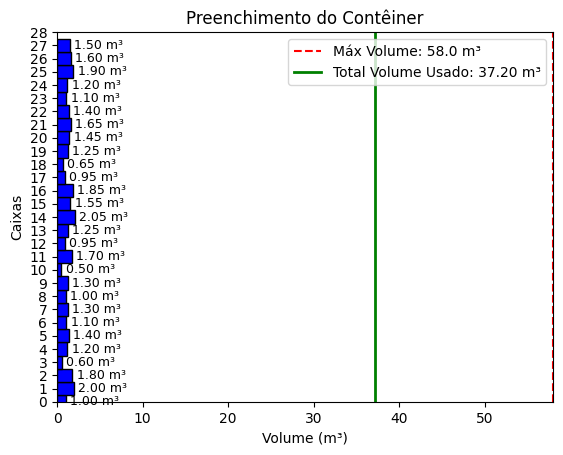

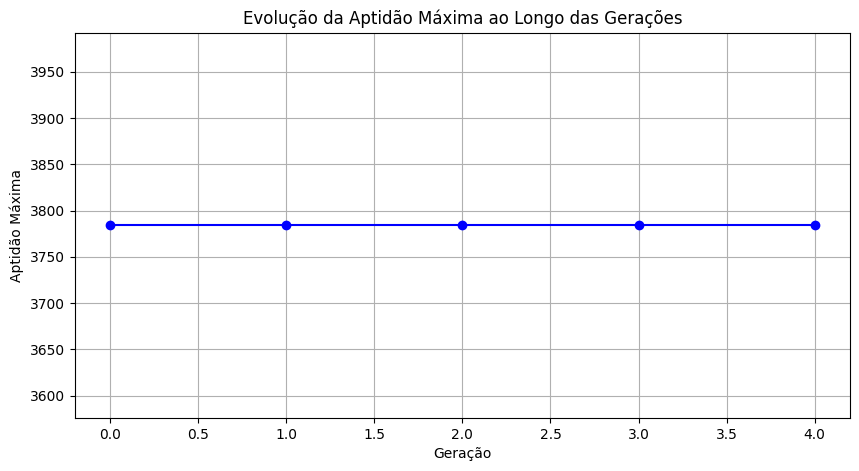

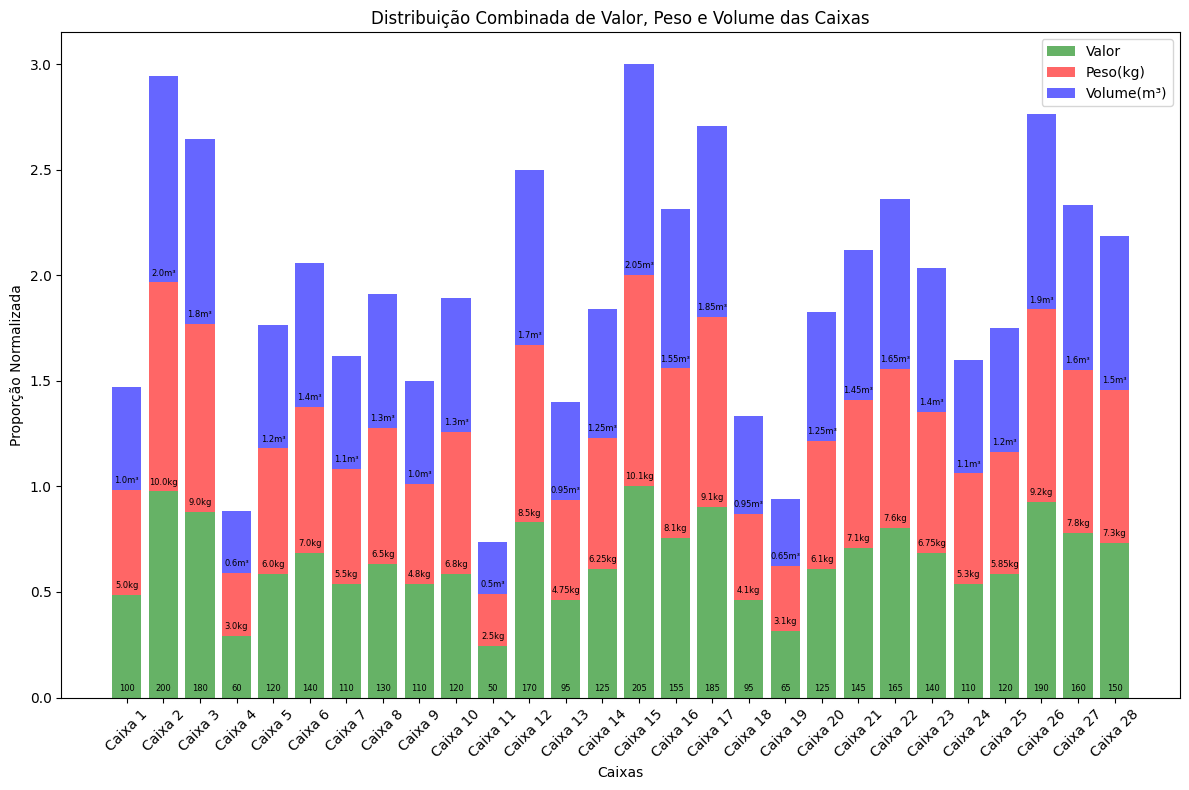

In [ ]:
total_weight, total_volume = calculate_weight_volume(best_individual)
print(f"\nMelhor Indivíduo: {best_individual}")
print(f"Valor Total: {best_value} dólares")
print(f"Peso Total: {total_weight / 1000} kg")  # Convertendo gramas para kg
print(f"Volume Total: {total_volume} metros cúbicos")

visualize_container(best_individual)
plot_fitness_evolution(best_fitness_values)
plot_combined_box_distributions(best_individual, boxes)

## Testando o problema em um algoritmo de força bruta

Abaixo implementamos um algoritmo combinatório de força bruta, para entender o quão otimizado nosso algoritmo genético é, quando comparado a soluções convencionais.

In [ ]:
import time

boxes = [
    (100, 5000, 1.0),
    (200, 10000, 2.0),
    (150, 8000, 1.5),
    (180, 9000, 1.8),
    (90, 4000, 0.9),
    (60, 3000, 0.6),
    (120, 6000, 1.2),
    (140, 7000, 1.4),
    (110, 5500, 1.1),
    (130, 6500, 1.3),
    (200, 9500, 1.9),
    (110, 4800, 1.0),
    (160, 7500, 1.5),
    (120, 6800, 1.3),
    (130, 5000, 1.2),
    (210, 10000, 2.1),
    (50, 2500, 0.5),
    (170, 8500, 1.7),
    (95, 4750, 0.95),
    (125, 6250, 1.25),
    (105, 5100, 1.05),
    (205, 10100, 2.05),
    (155, 8100, 1.55),
    (185, 9100, 1.85),
    (95, 4100, 0.95),
]

max_weight = 27000000
max_volume = 28.0

def calculate_combination_value(combination):
    total_value = sum(box[0] for box in combination)
    total_weight = sum(box[1] for box in combination)
    total_volume = sum(box[2] for box in combination)

    if total_weight <= max_weight and total_volume <= max_volume:
        return total_value
    else:
        return 0

def generate_combinations(boxes, index, current_combination, all_combinations):
    if index >= len(boxes):
        all_combinations.append(current_combination)
        return

    generate_combinations(boxes, index + 1, current_combination + [boxes[index]], all_combinations)
    generate_combinations(boxes, index + 1, current_combination, all_combinations)

def brute_force_optimization(boxes):
    best_value = 0
    best_combination = []

    all_combinations = []
    generate_combinations(boxes, 0, [], all_combinations)

    for combination in all_combinations:
        value = calculate_combination_value(combination)
        if value > best_value:
            best_value = value
            best_combination = combination

    return best_value, best_combination

def measure_execution_time(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    execution_time = end_time - start_time
    return result, execution_time

result, execution_time = measure_execution_time(brute_force_optimization, boxes)
best_value, best_combination = result

print(f"Melhor valor: {best_value} dólares")
print(f"Tempo de execução: {execution_time:.6f} segundos")


Melhor valor: 2840 dólares
Tempo de execução: 193.719991 segundos


Abaixo vamos utilizar os mesmos parametros e requisitos, só que com nosso algoritmo genético.

In [ ]:
boxes = [
    (100, 5000, 1.0),
    (200, 10000, 2.0),
    (150, 8000, 1.5),
    (180, 9000, 1.8),
    (90, 4000, 0.9),
    (60, 3000, 0.6),
    (120, 6000, 1.2),
    (140, 7000, 1.4),
    (110, 5500, 1.1),
    (130, 6500, 1.3),
    (200, 9500, 1.9),
    (110, 4800, 1.0),
    (160, 7500, 1.5),
    (120, 6800, 1.3),
    (130, 5000, 1.2),
    (210, 10000, 2.1),
    (50, 2500, 0.5),
    (170, 8500, 1.7),
    (95, 4750, 0.95),
    (125, 6250, 1.25),
    (105, 5100, 1.05),
    (205, 10100, 2.05),
    (155, 8100, 1.55),
    (185, 9100, 1.85),
    (95, 4100, 0.95),
]

population_size = 25
num_generations = 50
max_weight = 27000000
max_volume = 38.0
mutation_rate = 0.01

population = generate_random_population(population_size)
best_fitness_values = []
weight_volumes = []
best_individual = None
best_value_genetic = 0

inicio = time.time()
for generation in range(num_generations):
    population = sorted(population, key=calculate_fitness, reverse=True)
    best_fitness = calculate_fitness(population[0])
    best_fitness_values.append(best_fitness)
    weight_volumes.append(calculate_weight_volume(population[0]))

    if best_fitness > best_value_genetic:
        best_value_genetic = best_fitness
        best_individual = population[0]

    new_population = [population[0]]
    while len(new_population) < population_size:
        parent1, parent2 = random.choices(population[:10], k=2)
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.extend([child1, child2])
    population[:] = new_population[:population_size]
fim = time.time()
execution_time_genetic = (fim - inicio)

total_weight, total_volume = calculate_weight_volume(best_individual)

print(f"Valor Total: {best_value_genetic} dólares")
print(f"Tempo de execução: {execution_time_genetic:.6f} segundos")

Valor Total: 3483.5526315789475 dólares
Tempo de execução: 0.022468 segundos


In [ ]:
def compare_execution_time(execution_time, execution_time_genetic):

  fig, ax = plt.subplots()

  execution_times = [execution_time, execution_time_genetic]
  labels = ['Força Bruta', 'Genético']
  colors = ['tab:red', 'tab:blue',]
  print(len(boxes))

  ax.bar(labels, execution_times,  label=labels, color=colors)

  ax.set_ylabel('Tempo de execução')
  ax.set_title('Tempo de execução: Algoritmos Força bruta X Genético com 50 caixas')
  ax.legend(title='Algoritmo')

  plt.show()
  print()
  print(f"Tempo de execução Força Bruta: {execution_time:.6f} segundos")
  print(f"Tempo de execução Genético: {execution_time_genetic:.6f} segundos")

In [ ]:
def compare_value(value, value_genetic):

  fig, ax = plt.subplots()

  execution_times = [value, value_genetic]
  labels = ['Força Bruta', 'Genético']
  colors = ['tab:red', 'tab:blue',]
  print(len(boxes))

  ax.bar(labels, execution_times,  label=labels, color=colors)

  ax.set_ylabel('Valor total em dólares')
  ax.set_title('Valor total em dólares: Força bruta X Genético com 50 caixas')
  ax.legend(title='Algoritmo')

  plt.show()
  print()
  print(f"Valor total em dólares Força Bruta: {execution_time:.6f} ")
  print(f"Valor total em dólares Genético: {execution_time_genetic:.6f} ")

25


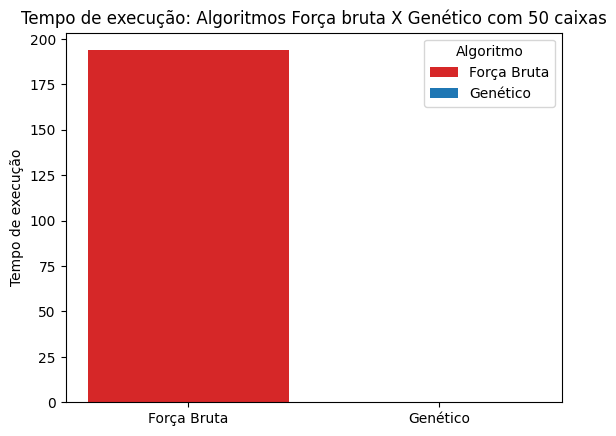


Tempo de execução Força Bruta: 193.719991 segundos
Tempo de execução Genético: 0.022468 segundos
25


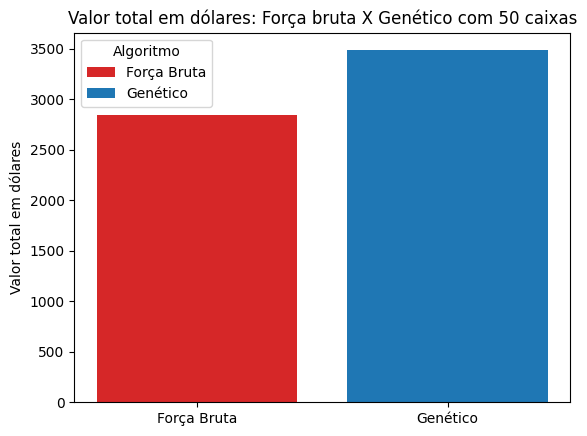


Valor total em dólares Força Bruta: 193.719991 
Valor total em dólares Genético: 0.022468 


In [ ]:
compare_execution_time(execution_time, execution_time_genetic)
compare_value(best_value, best_value_genetic)

## Conclusão

Após a realização de testes com o nosso algoritmo genético, alterações nos parâmetros e também um teste de força bruta, chegamos a conclusão de que o melhor formato de solução heurístima, ou seja, que prioriza a rapidez e eficiência na solução do problema, é o caminho Algoritmo Genético.

Nosso problema consiste em maximizar o lucro de uma empresa de fretes maritimos considerando os requisitos de sucesso (peso e volume totais do container). Resolvemos testar o problema com um algoritmo de força bruta, onde tanto o valor total de lucro quanto o tempo de execução do algoritmo não foram satisfatórios.

In [ ]:
print(f"O Algoritmo de Força Bruta foi {'{:.2f}'.format(((execution_time - execution_time_genetic )/execution_time_genetic)*100)} % mais LENTO do que o algoritmo genético, com a mesma quantidade de caixas e mesmos requisitos.")
print()
print(f"O LUCRO do Algoritmo Genético foi {'{:.2f}'.format(((best_value_genetic - best_value)/best_value)*100)} % MAIOR do que o algoritmo de força bruta, com a mesma quantidade de caixas e mesmos requisitos.")

O Algoritmo de Força Bruta foi 862109.68 % mais LENTO do que o algoritmo genético, com a mesma quantidade de caixas e mesmos requisitos.

O LUCRO do Algoritmo Genético foi 22.66 % MAIOR do que o algoritmo de força bruta, com a mesma quantidade de caixas e mesmos requisitos.
